<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/AmazonSalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('ॐ श्री सरस्वत्यै नमः',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

ॐ श्री सरस्वत्यै नमः 2025-10-24 11:49:08.380587+05:30
Python 3.12.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


How I used [chatGPT](https://chatgpt.com/share/68fb1a9f-7044-8013-8b9c-e8d31743a505) to solve this problem

In [2]:
# original data from https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data
#
!wget -q -O AmazonSalesData.csv "https://github.com/Praxis-QR/RDWH/raw/refs/heads/main/data/AmazonSalesData.csv"
!wget -q -O AmazonSalesData_Sample.csv "https://github.com/Praxis-QR/RDWH/raw/refs/heads/main/data/AmazonSalesData_Sample.csv"

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('AmazonSalesData.csv')
df.head()

/tmp/ipython-input-129791356.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AmazonSalesData.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
# Convert Date to datetime and clean data
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

In [6]:
# Drop rows where Amount is missing
df_clean = df.dropna(subset=['Amount'])

In [7]:
# Overall Sales Summary
sales_summary = {
    "Total Orders": df_clean['Order ID'].nunique(),
    "Total Quantity Sold": df_clean['Qty'].sum(),
    "Total Revenue (INR)": df_clean['Amount'].sum().round(2),
    "Average Order Value (INR)": df_clean['Amount'].mean().round(2)
}

print(pd.Series(sales_summary))

Total Orders                   113030.00
Total Quantity Sold            116482.00
Total Revenue (INR)          78592678.30
Average Order Value (INR)         648.56
dtype: float64


In [8]:
category_report = (
    df_clean.groupby('Category')[['Qty', 'Amount']]
    .sum()
    .sort_values(by='Amount', ascending=False)
)

#print(category_report)
category_report

,Qty,Amount
Category,,
Set,45225,39204124.03
kurta,44970,21299546.70
Western Dress,13939,11216072.69
Top,9899,5347792.30
Ethnic Dress,1053,791217.66
Blouse,844,458408.18
Bottom,397,150667.98
Saree,152,123933.76
Dupatta,3,915.00


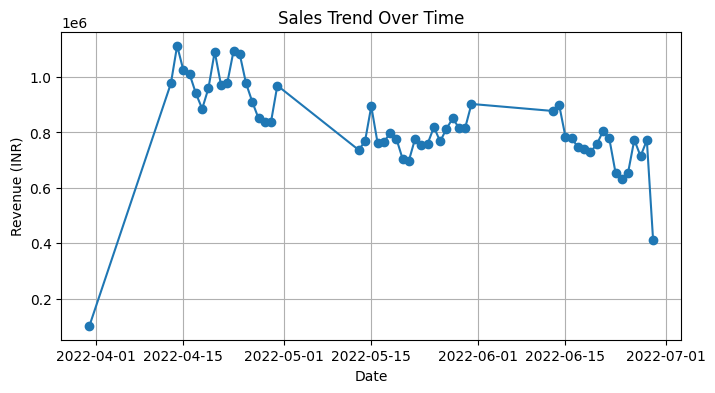

In [9]:
sales_trend = (
    df_clean.groupby('Date')['Amount']
    .sum()
    .reset_index()
    .sort_values('Date')
)

# Optional: plot trend
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(sales_trend['Date'], sales_trend['Amount'], marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()

In [10]:
#sales_trend
sales_trend = sales_trend.set_index('Date')
#sales_trend

<Axes: title={'center': 'Sales Trend Over Time'}, xlabel='Date', ylabel='Revenue (INR)'>

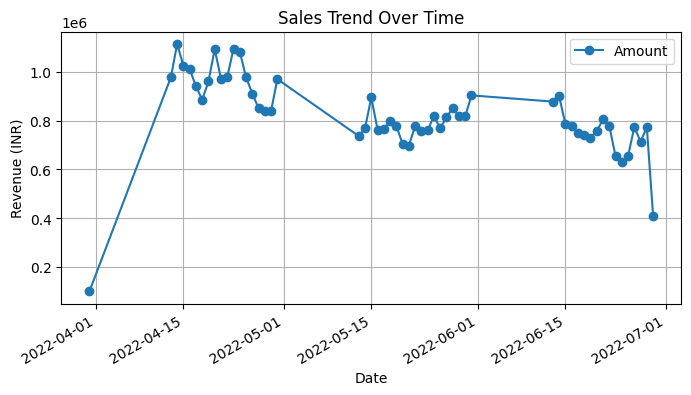

In [11]:
sales_trend.plot(
    kind='line',
    marker='o',
    title='Sales Trend Over Time',
    xlabel='Date',
    ylabel='Revenue (INR)',
    figsize=(8,4),
    grid=True
)

In [12]:
fulfilment_report = (
    df_clean.groupby(['Fulfilment', 'Status'])[['Qty', 'Amount']]
    .sum()
    .sort_values(by='Amount', ascending=False)
)

print(fulfilment_report)

                                            Qty      Amount
Fulfilment Status                                          
Amazon     Shipped                        77851  50324255.0
Merchant   Shipped - Delivered to Buyer   28886  18650815.0
Amazon     Cancelled                       5656   3729112.0
Merchant   Cancelled                          0   3190172.3
           Shipped - Returned to Seller    1970   1269644.0
           Shipped - Picked Up              977    661252.0
Amazon     Pending                          413    268784.0
Merchant   Pending - Waiting for Pick Up    283    192138.0
           Pending                          244    161487.0
           Shipped - Returning to Seller    150    107620.0
           Shipped - Out for Delivery        35     26971.0
           Shipped - Rejected by Buyer       11      7295.0
           Shipped - Lost in Transit          5      1997.0
           Shipped - Damaged                  1      1136.0


In [13]:
# Top Cities
top_cities = (
    df_clean.groupby('ship-city')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Top States
top_states = (
    df_clean.groupby('ship-state')['Amount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 Cities by Sales:\n", top_cities)
print("\nTop 10 States by Sales:\n", top_states)

Top 10 Cities by Sales:
 ship-city
BENGALURU    6849664.99
HYDERABAD    4946032.82
MUMBAI       3704461.80
NEW DELHI    3613874.78
CHENNAI      3098745.74
PUNE         2338518.18
KOLKATA      1414978.87
GURUGRAM     1221618.74
THANE        1004355.29
LUCKNOW       933926.34
Name: Amount, dtype: float64

Top 10 States by Sales:
 ship-state
MAHARASHTRA       13335534.14
KARNATAKA         10481114.37
TELANGANA          6916615.65
UTTAR PRADESH      6816642.08
TAMIL NADU         6515650.11
DELHI              4235215.97
KERALA             3830227.58
WEST BENGAL        3507880.44
ANDHRA PRADESH     3219831.72
HARYANA            2882092.99
Name: Amount, dtype: float64


#ChronoTYM <br>
In Indic phraseology, tantra is knowledge, a yantra is a device to explore this knowledge and a mantra is the code that unlocks both the tantra and its yantra. Chrono/TYM a sci-fi trilogy that recreates this framework where the first novel Chronotantra defines the contours of a tech driven, futuristic society, the second, Chronoyantra, describes a device used to explore the genesis of this society, while the third, Chronomantra finally reveals the code, the key, that unlocks this puzzle.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjdu_ajYwBRzk5iFYlcs59ZoRMMg6rhNm4JERKspvFJoveJsnfwRlzMICiC37UOja_Bd4sbfLA1pyyBbe0mj3tUfDBXoqCzNUDw3Wux7acoJBaLkWjAvJXfa7drRY2GQRAlFxEY9O7a7raY4RKy7cA3Uxgf5QsaZQ99C9GfXxFSex_rke8ROhAn41t8zOqK/s1640/tymBanner01_3.png)